# 1. Introduction
This is an analysis of my personal workout data that I've tracked through a phone application called RepCount, since 2016. The objective is to practice my data analysis skills while hopefully uncovering some interesting insights related to my workout history.

# 2. Inspecting the Data

We start by importing the libraries that will be used throughout the analysis, and then reading in the dataset.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [3]:
"""
Reads the csv file into a dataframe.
After inspecting the datafile in a spreadsheet, the column "Anteckningar" has some values containing ',' which
messes with the CSV format. Therefore we set error_bad_lines to False.
"""
training_data = pd.read_csv('./my_training.csv', on_bad_lines='skip', sep=";")

Next, we'll inspect the dataset's content and structure.

In [4]:
training_data.shape

(26622, 12)

In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26622 entries, 0 to 26621
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Starttid      26622 non-null  object 
 1   Sluttid       14526 non-null  object 
 2   Övning        26621 non-null  object 
 3   Vikt          26403 non-null  float64
 4   Reps          26441 non-null  float64
 5   Anteckningar  7411 non-null   object 
 6   Kcal          5045 non-null   float64
 7   Distans       5047 non-null   float64
 8   Tid           5081 non-null   float64
 9   Kategori      26622 non-null  object 
 10  Namn          26622 non-null  object 
 11  Kroppsvikt    18742 non-null  float64
dtypes: float64(6), object(6)
memory usage: 2.4+ MB


In [6]:
training_data.describe()

,Vikt,Reps,Kcal,Distans,Tid,Kroppsvikt
count,26403.000000,26441.000000,5045.000000,5047.000000,5081.000000,18742.000000
mean,45.130578,11.113309,1.715758,0.044181,31.467034,79.549701
std,36.330284,4.204963,20.258208,0.500380,289.684051,4.432039
min,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,15.000000,8.000000,0.000000,0.000000,0.000000,76.800000
50%,32.500000,11.000000,0.000000,0.000000,0.000000,79.700000
75%,70.000000,14.000000,0.000000,0.000000,0.000000,82.200000
max,185.000000,60.000000,403.000000,12.650000,4555.000000,88.450000


In [7]:
training_data.head(10)

,Starttid,Sluttid,Övning,Vikt,Reps,Anteckningar,Kcal,Distans,Tid,Kategori,Namn,Kroppsvikt
0,2022-11-07 11:47,2022-11-07 12:29,Incline Bench Press 30’,65.0,9.0,"Blev typ 3rir igen, glömde öka till 2rir/+1 (f...",NaN,NaN,NaN,Chest,Lunch 1,82.85
1,2022-11-07 11:47,2022-11-07 12:29,Incline Bench Press 30’,65.0,8.0,Över steg 8,NaN,NaN,NaN,Chest,Lunch 1,82.85
2,2022-11-07 11:47,2022-11-07 12:29,Incline Bench Press 30’,65.0,7.0,NaN,NaN,NaN,NaN,Chest,Lunch 1,82.85
3,2022-11-07 11:47,2022-11-07 12:29,Pull Up,0.0,12.0,+1,NaN,NaN,NaN,Back,Lunch 1,82.85
4,2022-11-07 11:47,2022-11-07 12:29,Pull Up,0.0,9.0,NaN,NaN,NaN,NaN,Back,Lunch 1,82.85
5,2022-11-07 11:47,2022-11-07 12:29,Pull Up,0.0,7.0,NaN,NaN,NaN,NaN,Back,Lunch 1,82.85
6,2022-11-07 11:47,2022-11-07 12:29,Dips,0.0,15.0,2rir,NaN,NaN,NaN,Triceps,Lunch 1,82.85
7,2022-11-07 11:47,2022-11-07 12:29,Dips,0.0,10.0,NaN,NaN,NaN,NaN,Triceps,Lunch 1,82.85
8,2022-11-07 11:47,2022-11-07 12:29,Dips,0.0,8.0,NaN,NaN,NaN,NaN,Triceps,Lunch 1,82.85
9,2022-11-07 11:47,2022-11-07 12:29,Startrac Biceps Curl,27.0,13.0,NaN,NaN,NaN,NaN,Biceps,Lunch 1,82.85


We have 12 different columns with varying levels of missing data, and 26622 rows. Each row represents a single set (a group of consecutive repetitions of an excercise performed without resting), containing metrics such as excercise type, weight, number of reps (repetitions), etc. 

Let's examine the missing data further.

### Missing Data

In [8]:
# Number of missing data per feature
training_data.isnull().sum()

Starttid            0
Sluttid         12096
Övning              1
Vikt              219
Reps              181
Anteckningar    19211
Kcal            21577
Distans         21575
Tid             21541
Kategori            0
Namn                0
Kroppsvikt       7880
dtype: int64

In [9]:
# Calculate the % of missing data per feature
total = training_data.isnull().sum().sort_values(ascending=False)  

percent_1 = training_data.isnull().sum()/training_data.isnull().count()*100  
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)  

missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])  

missing_data.loc[total > 0]

,Total,%
Kcal,21577,81.0
Distans,21575,81.0
Tid,21541,80.9
Anteckningar,19211,72.2
Sluttid,12096,45.4
Kroppsvikt,7880,29.6
Vikt,219,0.8
Reps,181,0.7
Övning,1,0.0


Several of these features contain too much missing data to be useful. The best option is to just drop these columns before the analysis (kcal, distans, tid, anteckningar, sluttid, and maybe kroppsvikt). 

I'd also like to see whether there are any periods throughout these years where I haven't been tracking my workouts consistently. I know I've been working out regularly, so let's check out my frequency of workouts on a monthly basis and if it has any dips. 

In [10]:
# Start by creating a new df as a copy of the original data, now that we're going to make edits
df = training_data.copy()

In [11]:
# Parse 'Starttid' column as a datetime object
df['parsed_date'] = pd.to_datetime(df['Starttid'], format="%Y-%m-%d %H:%M")

In [12]:
# Create a year-month column
df['year-month'] = df['parsed_date'].dt.strftime('%Y-%m')

In [13]:
# Validate the new columns
df[['parsed_date', 'year-month']].head()

,parsed_date,year-month
0,2022-11-07 11:47:00,2022-11
1,2022-11-07 11:47:00,2022-11
2,2022-11-07 11:47:00,2022-11
3,2022-11-07 11:47:00,2022-11
4,2022-11-07 11:47:00,2022-11


In [14]:
# Get the number of unique dates (workouts) per year-month
frequency_by_year_month = df.groupby('year-month')['parsed_date'].nunique()
frequency_by_year_month = frequency_by_year_month.reset_index()

In [15]:
frequency_by_year_month

,year-month,parsed_date
0,2016-02,8
1,2016-03,20
2,2016-04,18
3,2016-05,23
4,2016-06,20
...,...,...
72,2022-07,11
73,2022-08,14
74,2022-09,13
75,2022-10,16


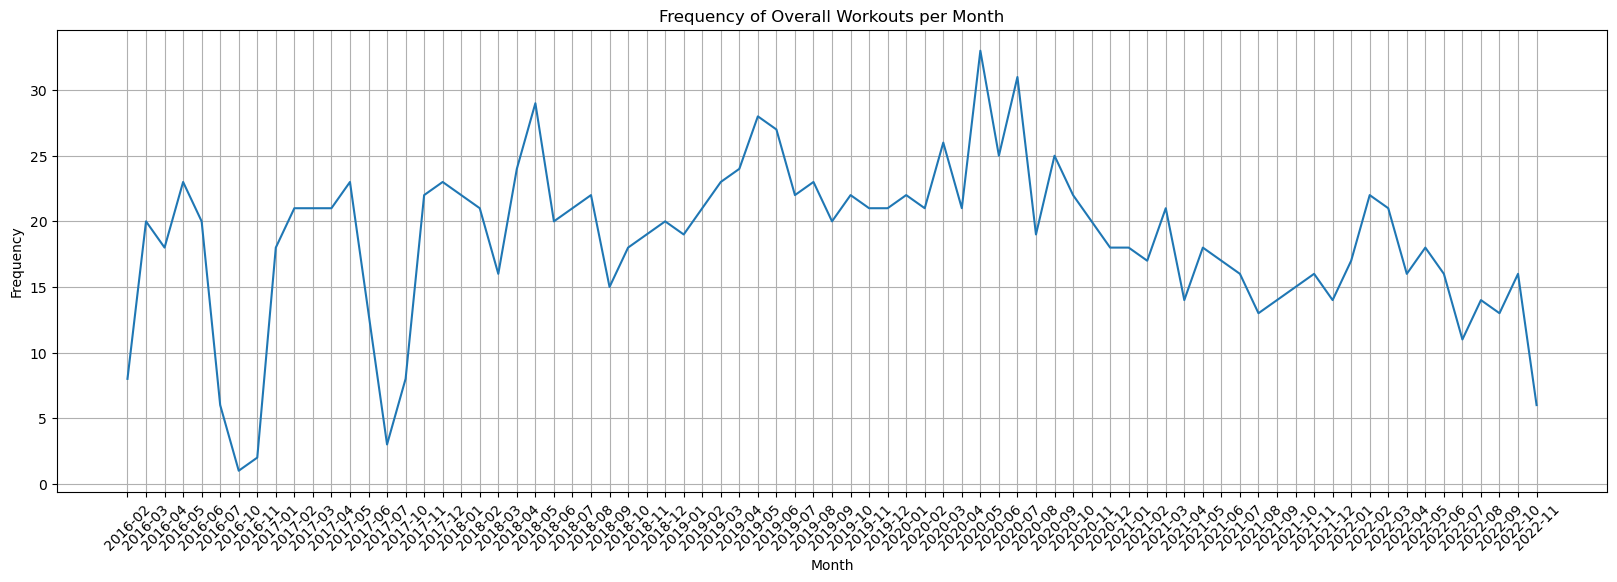

In [16]:
plt.figure(figsize=(20, 6))

sns.lineplot(x=frequency_by_year_month['year-month'], y=frequency_by_year_month['parsed_date'])
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency of Overall Workouts per Month')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.grid(True) # Add a grid

plt.show()

Observing the plot, we see that there are some periods around July 2016 and June 2017 where I've barely recorded any workouts. We have complete data between 2018 and September 2022. 

I also notice that I've recorded >30 workouts in April and June of 2020. During that time period, I experimented with training twice a day some days. I did not workout everyday.

# 2. Data Cleaning 

It's time to clean this data so it can be properly analyzed later.

### Drop features

We'll start by dropping features we won't need due to large amounts of missing data rendering them pretty much useless.

In [17]:
df.columns

Index(['Starttid', 'Sluttid', 'Övning', 'Vikt', 'Reps', 'Anteckningar', 'Kcal',
       'Distans', 'Tid', 'Kategori', 'Namn', 'Kroppsvikt', 'parsed_date',
       'year-month'],
      dtype='object')

In [18]:
# Dropping columns not needed for the analysis
df = df.drop(['Anteckningar', 'Namn', 'Sluttid', 'Kcal', 'Distans', 'Tid'], axis=1)

### Renaming 

Let's rename our columns to english language.

In [19]:
df.rename(columns={'Starttid': 'date', 
                   'Kategori': 'target_muscle',
                   'Övning': 'excercise_type',
                   'Vikt': 'weight',
                   'Reps': 'reps',
                   'Kroppsvikt': 'bodyweight',
                  }, inplace=True)

In [20]:
df.head(5)

,date,excercise_type,weight,reps,target_muscle,bodyweight,parsed_date,year-month
0,2022-11-07 11:47,Incline Bench Press 30’,65.0,9.0,Chest,82.85,2022-11-07 11:47:00,2022-11
1,2022-11-07 11:47,Incline Bench Press 30’,65.0,8.0,Chest,82.85,2022-11-07 11:47:00,2022-11
2,2022-11-07 11:47,Incline Bench Press 30’,65.0,7.0,Chest,82.85,2022-11-07 11:47:00,2022-11
3,2022-11-07 11:47,Pull Up,0.0,12.0,Back,82.85,2022-11-07 11:47:00,2022-11
4,2022-11-07 11:47,Pull Up,0.0,9.0,Back,82.85,2022-11-07 11:47:00,2022-11


In [21]:
df.count()

date              26622
excercise_type    26621
weight            26403
reps              26441
target_muscle     26622
bodyweight        18742
parsed_date       26622
year-month        26622
dtype: int64

Now we have approximately the same number of entries in our features except for bodyweight. Since this analysis will be purely exploratory, we don't have to "deal" with missing data in the same way we would have if we were creating a model or statistical inference. Same goes for outliers. 



Let's check if bodyweight is randomly missing throughout the dataset or if it's mainly missing during a specific time period.

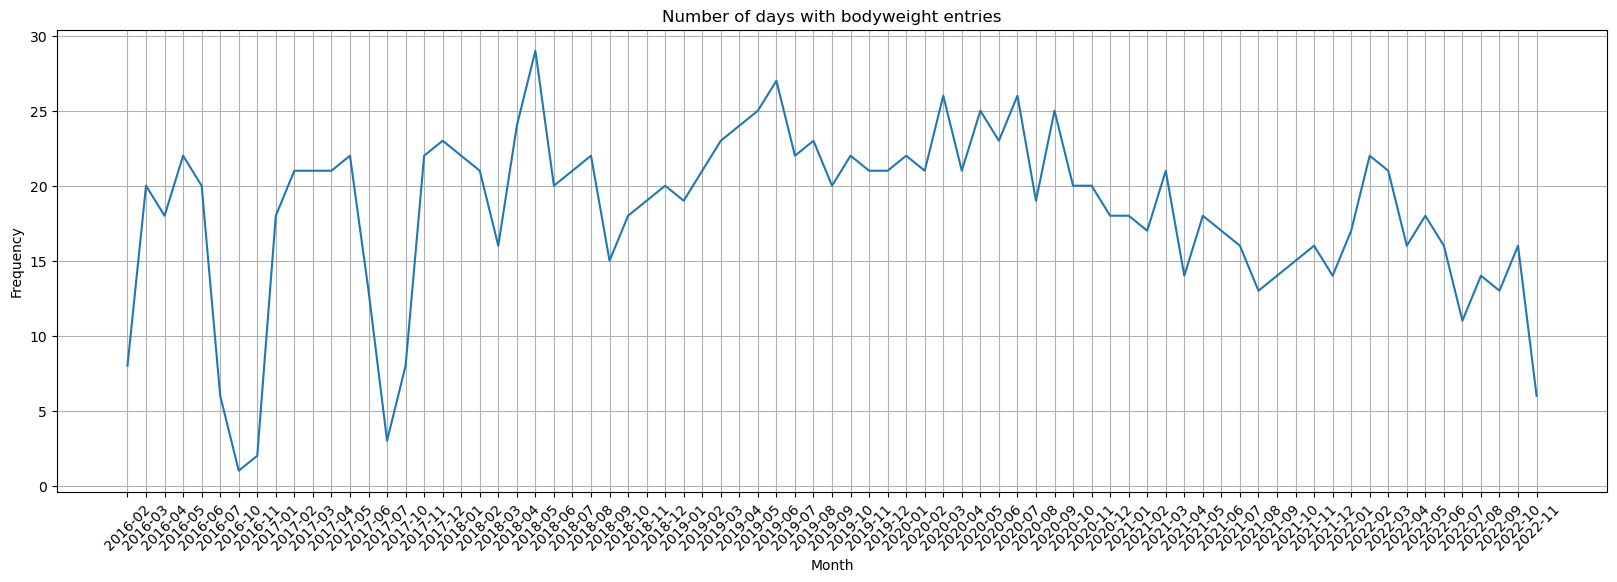

In [65]:
# Group by 'year-month' and count the unique dates with 'bodyweight' entries for each month
unique_bodyweight_days = df.groupby('year-month')['parsed_date'].nunique()

plt.figure(figsize=(20, 6))

sns.lineplot(x=unique_bodyweight_days.index, y=unique_bodyweight_days.values)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Number of days with bodyweight entries')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add a grid

plt.show()


The "missing" bodyweight entries seem to primarily correspond to the time periods when I didn't track my workouts using this application.

# 3. Organising Data

At this stage, I have selected the features that will be used for the analysis, and properly named them. Now, we're going to engineer some new features based on the existing features to make the dataset more useful and easier to analyze. 

### Date Features

First, we'll edit the `parsed_date` column so it just keeps the date, not the time-part of it.

In [69]:
# str[:10] to grab the dates without the hours:minutes
df['parsed_date'] = pd.to_datetime(df['date'].str[:10], format="%Y-%m-%d")

df['parsed_date'].head(3)

0   2022-11-07
1   2022-11-07
2   2022-11-07
Name: parsed_date, dtype: datetime64[ns]

We already have year-month columns, but I'll also want columns months independent of the year, the year itself, and weeks.

In [71]:
# Adding year and month to each row
df['year'] = df['parsed_date'].dt.year
df['month'] = df['parsed_date'].dt.month
df['week'] = df['parsed_date'].dt.isocalendar().week

df[['year', 'year-month', 'month', 'week']]

,year,year-month,month,week
0,2022,2022-11,11,45
1,2022,2022-11,11,45
2,2022,2022-11,11,45
3,2022,2022-11,11,45
4,2022,2022-11,11,45
...,...,...,...,...
26617,2016,2016-02,2,7
26618,2016,2016-02,2,7
26619,2016,2016-02,2,7
26620,2016,2016-02,2,7


### Calculate training volume

 Training volume can be measured as number of "tough" sets or as weight x reps. 
 Since each row is one set, we'll just add a 1 for each row so it will be easy to see number of sets when aggregating.

In [25]:
df['training_volume'] = df['weight'] * df['reps']

In [26]:
# Create a new column for training volume based on number of sets (used in aggregations)
df['sets'] = 1

### Create dummy columns per target muscle

Would also like some way of measuring volume per bodypart ('Kategori') per day.
This would be easiest if I first have a way to merge the the dates of the same day but then I need to create separate columns for the "Kategori" options and merge those values for each day as well.

In [27]:
df['target_muscle'].unique()

array(['Chest', 'Back', 'Triceps', 'Biceps', 'Hamstrings',
       'Quads & Glutes', 'Delts', 'Abs', 'Calves', 'Traps', 'Forearms',
       'Cardio', 'Övriga', 'Calisthenics'], dtype=object)

In [28]:
def add_dummy_columns(dataframe, target_muscle_col):
    # Get the unique muscle groups from the target muscle column
    unique_muscles = dataframe[target_muscle_col].unique()

    # Loop through the unique muscle groups and create a new column for each
    for muscle in unique_muscles:
        # Create a new column with dummy coding for the current muscle group
        dataframe[muscle] = dataframe[target_muscle_col].apply(lambda x: 1 if x == muscle else 0)

# Usage:
add_dummy_columns(df, 'target_muscle')

In [29]:
df.columns

Index(['date', 'excercise_type', 'weight', 'reps', 'target_muscle',
       'bodyweight', 'parsed_date', 'year-month', 'year', 'month', 'week',
       'training_volume', 'sets', 'Chest', 'Back', 'Triceps', 'Biceps',
       'Hamstrings', 'Quads & Glutes', 'Delts', 'Abs', 'Calves', 'Traps',
       'Forearms', 'Cardio', 'Övriga', 'Calisthenics'],
      dtype='object')

In [30]:
# Dropping target muscles I'm not interested in
#df = df.drop(['Forearms', 'Cardio', 'Övriga', 'Calisthenics', 'Övriga'], axis=1)

In [31]:
# Dropping muscle groups that are not of interest
muscles_to_drop = ['Forearms', 'Cardio', 'Övriga', 'Calisthenics']
for muscle in muscles_to_drop:
    if muscle in df.columns:
        df = df.drop(muscle, axis=1)

Since we know, from our data exploration, that we have periods in 2016-2017 where workouts weren't tracked at all, I'll create separate dataframes. One with data from the entire time period, and one including only the years where the workout tracking app was used consistently. 

## Summary 
- Data ranges from February 2016 until November 2022
- There are a about three months in total spread out over 2016/2017 where I most likely worked out without tracking it
- Dataset contains 26622 rows and 12 features
- There's currently 1 row per set per excercise per day
- Some features have too much missing data to be useful and some features aren't useful in answering our questions
- We'll have to do some feature engineering to create some new variables in order to answer our research questions

### Research Questions
Based on the exploration, I've come up with the following questions I'd like to answer:
1. Which months do I train the hardest?
2. Which target muscles do I train most frequently?
3. Am I lifting more weight over time?
4. Do I have any imbalances regarding body parts in my workouts?

-----

- TODO Drop unusable features
- TODO Rename columns to more descriptive names
- TODO Parse date column
- TODO Calculations of training volume
- TODO Aggregations (e.g. day, target muscle, etc.)


# 4. Analysis (RQs)

## RQ1: Which months do I train the hardest ?

(based on training volume)

In [32]:
# Aggregates by month, doesn't account for the year
aggregated_by_month = df.groupby(df['month']).sum()

/var/folders/t_/0sss_n354p10j1d1j41c4ml00000gn/T/ipykernel_46645/171315469.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_by_month = df.groupby(df['month']).sum()


### Training volume per month overall

In [33]:
training_volume_per_month = aggregated_by_month['training_volume']
training_volume_per_month

month
1      997912.50
2     1235601.90
3     1295550.55
4      999257.50
5     1138599.90
6      975758.00
7      934520.50
8      763694.00
9      664489.20
10     820825.60
11     964096.25
12     906333.25
Name: training_volume, dtype: float64

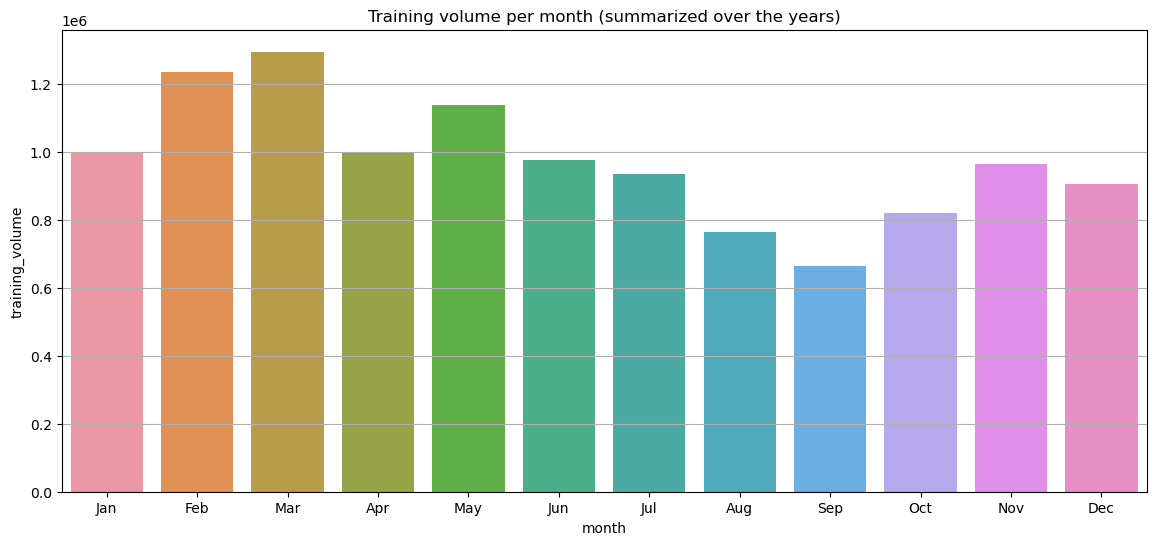

In [34]:
# Plot number of sets per month
plt.figure(figsize=(14,6))
plt.grid(True)
ax = sns.barplot(x=training_volume_per_month.index, y=training_volume_per_month)
ax.set_title("Training volume per month (summarized over the years)")
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

We'll also check for the number of sets (number of sets is a popular proxy for training volume which in some situations is even more telling) per month.

In [35]:
sets_per_month = aggregated_by_month['sets']
print(sets_per_month)

month
1     2302
2     2776
3     2938
4     2220
5     2717
6     2274
7     2058
8     1761
9     1489
10    1917
11    2178
12    1992
Name: sets, dtype: int64


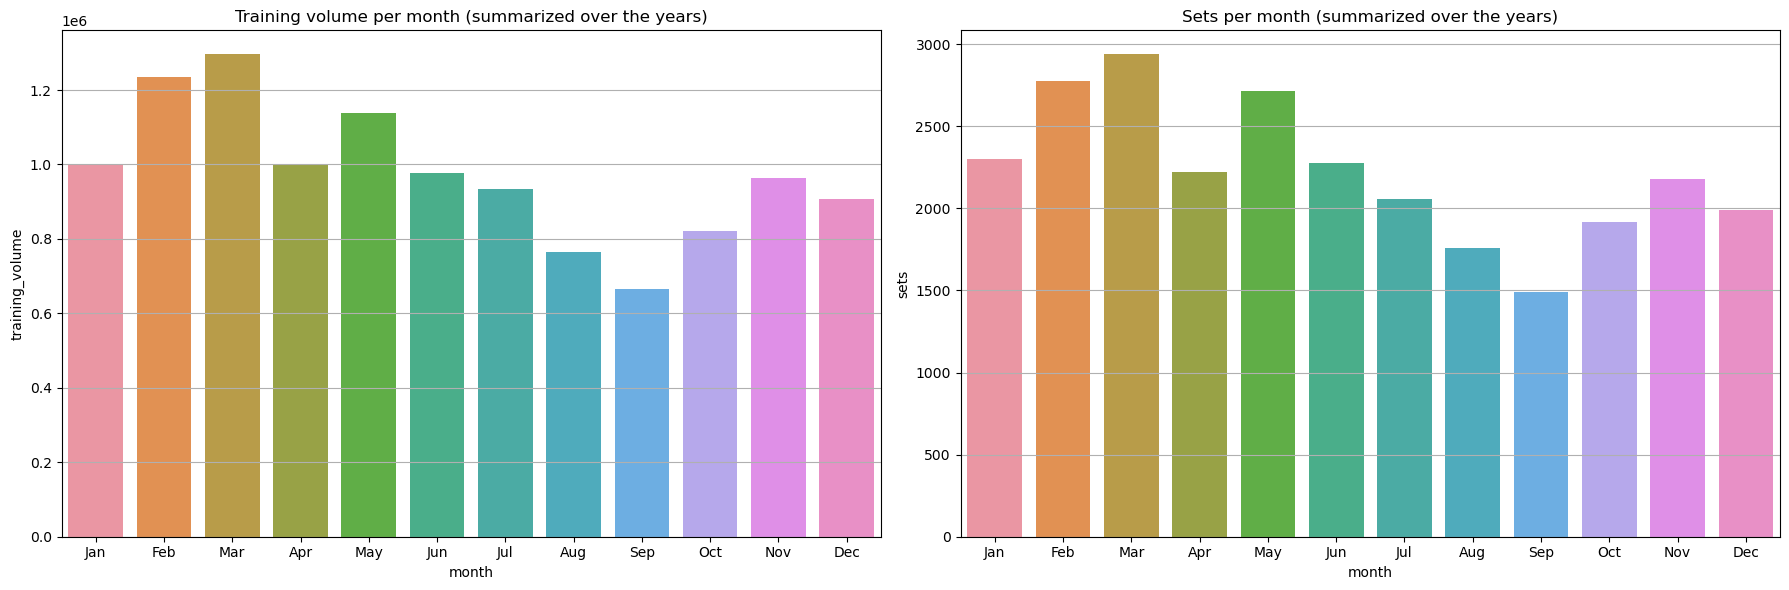

In [36]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot 1: Training volume per month
ax1 = axes[0]
sns.barplot(x=training_volume_per_month.index, y=training_volume_per_month, ax=ax1)
ax1.set_title("Training volume per month (summarized over the years)")
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


# Plot 2: Sets per month
ax2 = axes[1]
sns.barplot(x=sets_per_month.index, y=sets_per_month, ax=ax2)
ax2.set_title("Sets per month (summarized over the years)")
ax2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


# Adjust spacing between subplots
plt.tight_layout()

ax1.yaxis.grid(True)
ax2.yaxis.grid(True)

# Show the plots
plt.show()

As we can see, the plots are nearly identical. We'll continue with the training volume variable for the remaining analysis regarding volume.

### Training volume per month per year

I'd also like to examine the training volume per month per year to see whether there are any anual differences. To do that, I'l create a grid to plot the yearly training volumes per month side-by-side.

Could it be affected by the periods in which I didn't track? Remember from the beginning of the analysis, that there were some periods in which workouts weren't tracked.

Gaps in workout tracking:
- 2016-08 to 2016-09
- 2016-12
- 2017-08 to 2017-09

In [37]:
# Aggregates by year, month, and target muscle

# Filter out the target muscles you're not interested in
unwanted_muscles = ['Forearms', 'Cardio', 'Övriga', 'Calisthenics']
df_filtered = df[~df['target_muscle'].isin(unwanted_muscles)]

# Add the month_year column
df_filtered['month_year'] = df_filtered['parsed_date'].dt.to_period('M')

# Defining how the columns I'm not grouping around are gonna be aggregated
agg_functions = {'weight': 'sum', 'reps': 'sum', 'bodyweight': 'first', 'training_volume': 'sum', 'sets': 'sum'}

# Grouping by month_year and target_muscle
aggregated_by_month_year = df_filtered.groupby(['month_year', 'target_muscle']).agg(agg_functions)
aggregated_by_month_year = aggregated_by_month_year.reset_index()

/var/folders/t_/0sss_n354p10j1d1j41c4ml00000gn/T/ipykernel_46645/1809866097.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['month_year'] = df_filtered['parsed_date'].dt.to_period('M')


/Users/ossianhempel/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


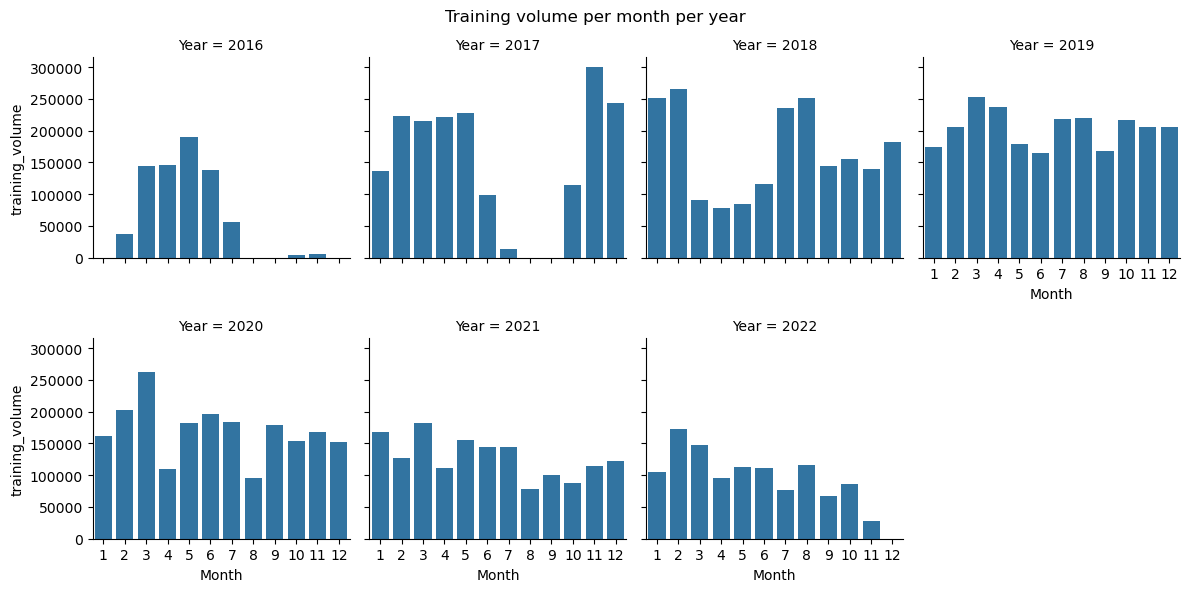

In [38]:
# Sum the training volumes per month and year across all target muscles
training_volume_per_year_month = aggregated_by_month_year.groupby('month_year')['training_volume'].sum().reset_index()

# Convert 'month_year' to separate 'Year' and 'Month' columns
training_volume_per_year_month['Year'] = training_volume_per_year_month['month_year'].dt.year
training_volume_per_year_month['Month'] = training_volume_per_year_month['month_year'].dt.month

# Create a DataFrame with all combinations of Year and Month
all_years_months = pd.MultiIndex.from_product([range(2016, 2023), range(1, 13)], names=['Year', 'Month'])

# Reindex training_volume_per_year_month and fill NaN values with 0
training_volume_per_year_month = training_volume_per_year_month.set_index(['Year', 'Month']).reindex(all_years_months).fillna(0).reset_index()

# Create a FacetGrid
g = sns.FacetGrid(training_volume_per_year_month, col="Year", col_wrap=4, height=3)

# Map a barplot onto each facet
g.map(sns.barplot, "Month", "training_volume")

# Increase the space between plots
plt.subplots_adjust(hspace=0.4)

# Add a title
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Training volume per month per year')

plt.show()

As we can see, in line with what I reported in the beginning of this analyses, there are periods during 2016 and 2017 were I didn't use the workout tracker. Thus, there's missing data during these two years. If we'd only want to use years with full data, then 2018-2021 are most suitable since other months don't have full data.

Let's repeat the initial analysis of training data per month including only the year with complete data, lets use averages instead of accumulated volumes:

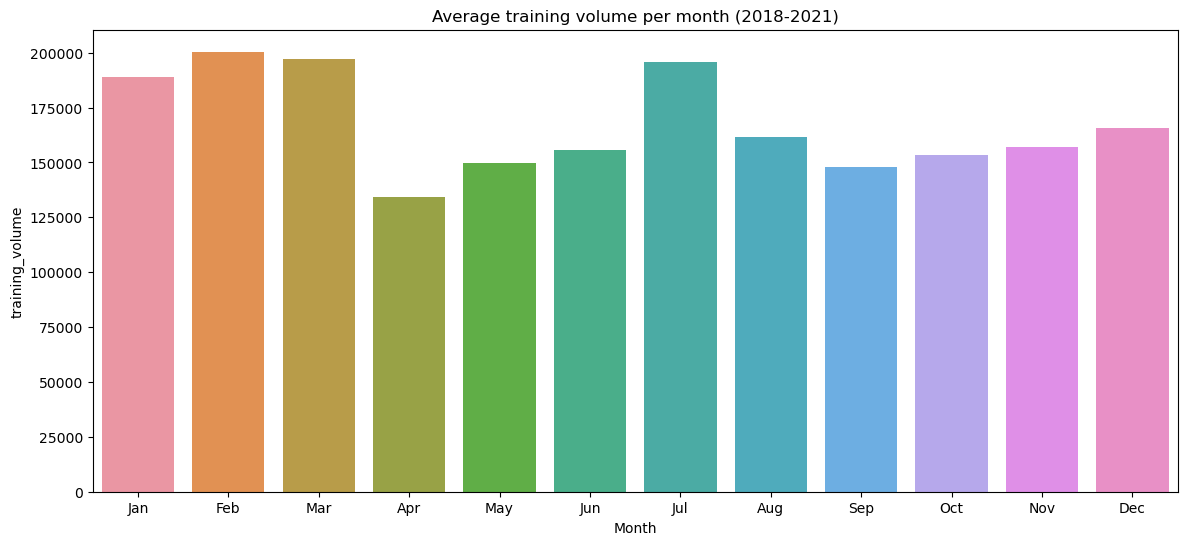

In [39]:
# Filter training_volume_per_year_month for the years 2018-2021
training_volume_per_month_2018_2021 = training_volume_per_year_month[(training_volume_per_year_month['Year'] >= 2018) & (training_volume_per_year_month['Year'] <= 2021)]

# Calculate average training volume per month over the years 2018-2021
training_volume_per_month_2018_2021 = training_volume_per_month_2018_2021.groupby('Month')['training_volume'].mean()

# Plot average training volume per month
plt.figure(figsize=(14,6))
ax = sns.barplot(x=training_volume_per_month_2018_2021.index, y=training_volume_per_month_2018_2021)
ax.set_title("Average training volume per month (2018-2021)")
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

Conclusion:


**Conclusion:**
- I've had the highest training volumes during February/March and in July. These peaks correspond to the end of my primary phases: massing (building muscle) and cutting (loosing bodyfat).

- The volume drops off significantly in April most likely due to me doing a longer deload phase after a long massing phase and before the cutting phase.

- After April, the training volume gradually build up again during the cutting phase and tops out in July (which is when I stop cutting usually).

- After the peak of the cutting phase, volume drops slightly again (similar pattern as from the peak of massing) before gradually building up again during the winter season massing phase.

- Overall, there's less volatility in training volume when dropping the years with missing data.

## RQ2: Which target muscles do I train most frequently?

TODO INTRO

There's no meaning looking at least frequently because I already know I haven't trained muscles such as traps and abs much at all, so they would end up the least trained.

Let's start by creating a new datasets with only clean data (2018-2021):

In [40]:
df_clean = df[(df['year'] < 2022) & (df['year'] > 2017)]
df_clean['year'].unique()

array([2021, 2020, 2019, 2018])

In [41]:
df_clean.head()

,date,excercise_type,weight,reps,target_muscle,bodyweight,parsed_date,year-month,year,month,...,Chest,Back,Triceps,Biceps,Hamstrings,Quads & Glutes,Delts,Abs,Calves,Traps
2401,2021-12-30 13:00,Pull Up,0.0,10.0,Back,84.35,2021-12-30,2021-12,2021,12,...,0,1,0,0,0,0,0,0,0,0
2402,2021-12-30 13:00,Pull Up,0.0,7.0,Back,84.35,2021-12-30,2021-12,2021,12,...,0,1,0,0,0,0,0,0,0,0
2403,2021-12-30 13:00,Dips,0.0,14.0,Triceps,84.35,2021-12-30,2021-12,2021,12,...,0,0,1,0,0,0,0,0,0,0
2404,2021-12-30 13:00,Dips,0.0,12.0,Triceps,84.35,2021-12-30,2021-12,2021,12,...,0,0,1,0,0,0,0,0,0,0
2405,2021-12-30 13:00,Seated Stack Leg Press,100.0,14.0,Quads & Glutes,84.35,2021-12-30,2021-12,2021,12,...,0,0,0,0,0,1,0,0,0,0


In [42]:
df_clean.columns

Index(['date', 'excercise_type', 'weight', 'reps', 'target_muscle',
       'bodyweight', 'parsed_date', 'year-month', 'year', 'month', 'week',
       'training_volume', 'sets', 'Chest', 'Back', 'Triceps', 'Biceps',
       'Hamstrings', 'Quads & Glutes', 'Delts', 'Abs', 'Calves', 'Traps'],
      dtype='object')

In [43]:
df_clean['target_muscle'].unique()

array(['Back', 'Triceps', 'Quads & Glutes', 'Hamstrings', 'Chest',
       'Biceps', 'Delts', 'Abs', 'Calves', 'Traps', 'Forearms', 'Cardio',
       'Övriga'], dtype=object)

In [44]:
# Filter out the target muscles you're not interested in
unwanted_muscles = ['Forearms', 'Cardio', 'Övriga', 'Calisthenics']
df_clean_filtered = df_clean[~df_clean['target_muscle'].isin(unwanted_muscles)]

# Defining how the columns I'm not grouping around are gonna be aggregated
agg_functions = {'weight': 'sum', 'reps': 'sum', 'bodyweight': 'first', 'training_volume': 'sum', 'sets': 'sum'}

# Grouping by Date and Muscle group
df_clean_aggregated = df_clean_filtered.groupby(['parsed_date', 'target_muscle']).agg(agg_functions)
df_clean_aggregated = df_clean_aggregated.reset_index()

df_clean_aggregated

,parsed_date,target_muscle,weight,reps,bodyweight,training_volume,sets
0,2018-01-02,Back,405.0,99.0,NaN,4185.0,9
1,2018-01-02,Biceps,70.0,56.0,NaN,980.0,4
2,2018-01-02,Chest,685.0,65.0,NaN,2140.0,11
3,2018-01-02,Delts,260.0,157.0,NaN,4340.0,9
4,2018-01-02,Triceps,90.0,30.0,NaN,900.0,3
...,...,...,...,...,...,...,...
4054,2021-12-28,Quads & Glutes,90.0,34.0,84.10,1530.0,2
4055,2021-12-30,Back,0.0,17.0,84.35,0.0,2
4056,2021-12-30,Hamstrings,0.0,15.0,84.35,0.0,2
4057,2021-12-30,Quads & Glutes,200.0,22.0,84.35,2200.0,2


In [45]:
df_clean_aggregated['target_muscle'].value_counts()

Back              601
Delts             600
Biceps            543
Chest             540
Triceps           444
Quads & Glutes    439
Hamstrings        358
Calves            324
Abs               120
Traps              90
Name: target_muscle, dtype: int64

Back and delts are the most frequently trained muscles while abs and traps are trained least frequently. I'd also like to see whether there are any trends regarding these frequencies (seasonality, increased/decreased over time).

In [46]:
# Filter the aggregated DataFrame for rows with "Back" as the target muscle 
back_workouts = df_clean_aggregated.loc[df_clean_aggregated['target_muscle'] == 'Back'].copy()

# Filter the aggregated DataFrame for rows with "Delts" as the target muscle
delts_workouts = df_clean_aggregated.loc[df_clean_aggregated['target_muscle'] == 'Delts'].copy()

# Extract the month and year from the 'parsed_date' column
back_workouts['month_year'] = back_workouts['parsed_date'].dt.to_period('M')
delts_workouts['month_year'] = delts_workouts['parsed_date'].dt.to_period('M')

# Count the frequency of workouts per month
back_workouts_frequency = back_workouts.groupby('month_year').size().reset_index(name='frequency')
delts_workouts_frequency = delts_workouts.groupby('month_year').size().reset_index(name='frequency')

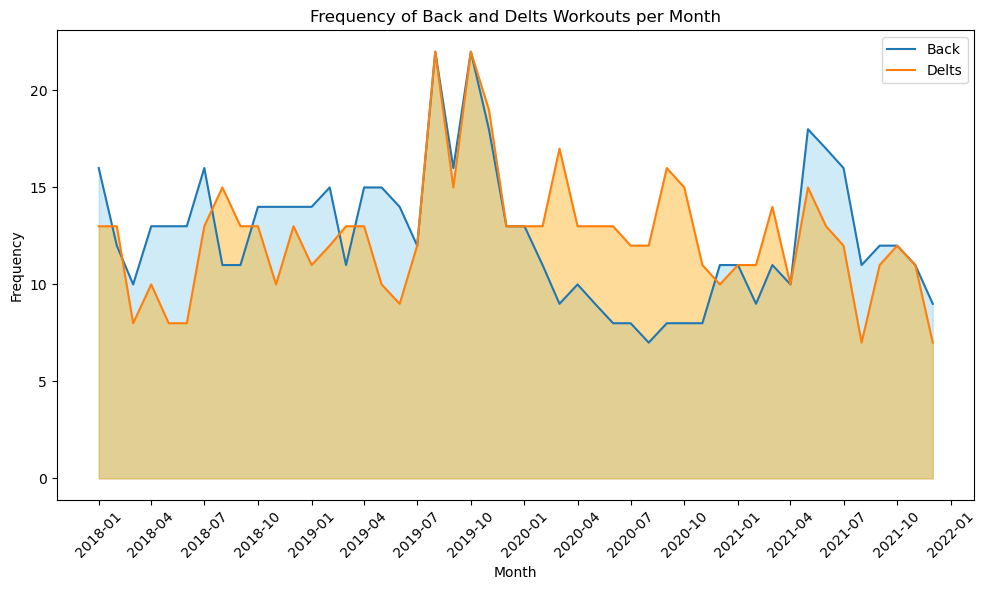

In [47]:
# Import necessary modules
import matplotlib.dates as mdates

# Plot the area chart using Matplotlib and Seaborn
plt.figure(figsize=(10, 6))

# Convert 'month_year' to datetime
"""back_workouts_frequency['month_year'] = pd.to_datetime(back_workouts_frequency['month_year'])
delts_workouts_frequency['month_year'] = pd.to_datetime(delts_workouts_frequency['month_year'])"""
# Convert 'month_year' to datetime
back_workouts_frequency['month_year'] = back_workouts_frequency['month_year'].dt.to_timestamp()
delts_workouts_frequency['month_year'] = delts_workouts_frequency['month_year'].dt.to_timestamp()


# Sort data
back_workouts_frequency.sort_values('month_year', inplace=True)
delts_workouts_frequency.sort_values('month_year', inplace=True)

# Plot data
plt.plot(back_workouts_frequency['month_year'], back_workouts_frequency['frequency'], label='Back')
plt.fill_between(back_workouts_frequency['month_year'], back_workouts_frequency['frequency'], color='skyblue', alpha=0.4)

plt.plot(delts_workouts_frequency['month_year'], delts_workouts_frequency['frequency'], label='Delts')
plt.fill_between(delts_workouts_frequency['month_year'], delts_workouts_frequency['frequency'], color='orange', alpha=0.4)

# Format x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3)) # set x-axis intervals to 3 months

plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency of Back and Delts Workouts per Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()

TODO more text

/var/folders/t_/0sss_n354p10j1d1j41c4ml00000gn/T/ipykernel_46645/3268814453.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_clean_aggregated.loc[:, 'month_year'] = pd.to_datetime(df_clean_aggregated['month_year'])


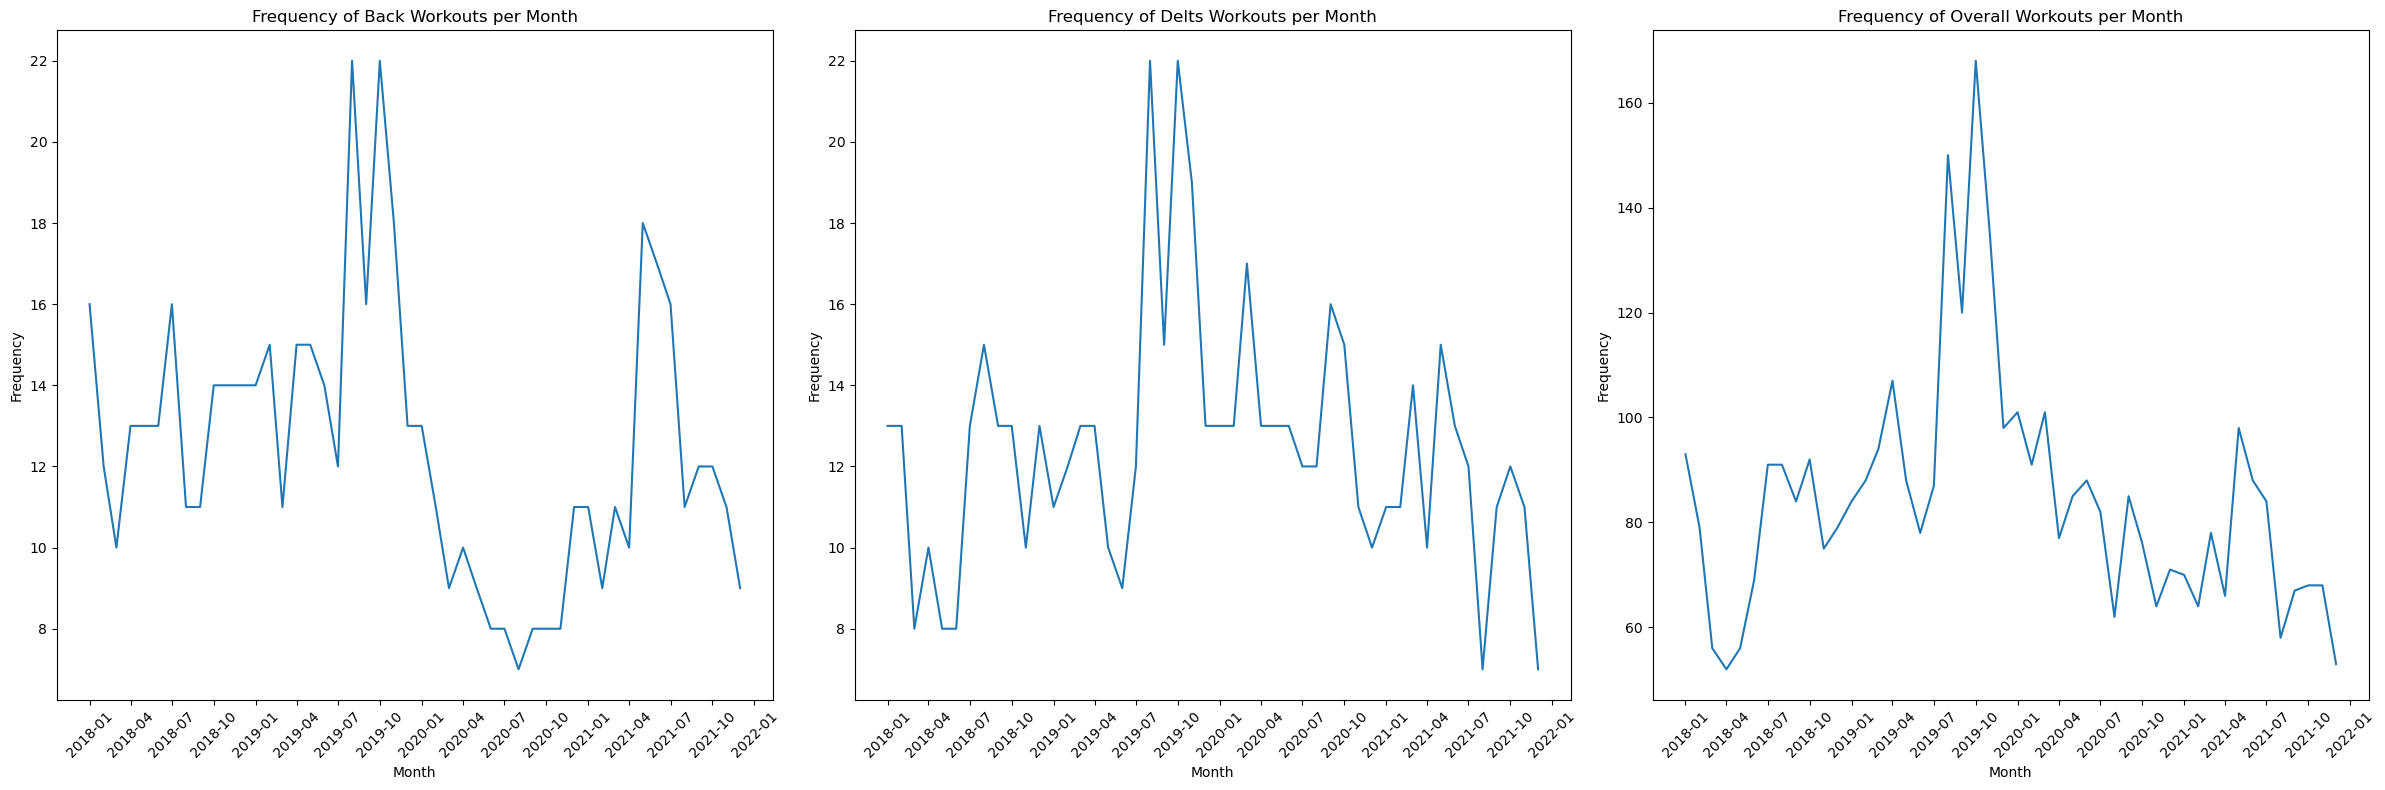

In [48]:
# Count the frequency of workouts per month
back_workouts_frequency = back_workouts.groupby('month_year').size().reset_index(name='frequency')
delts_workouts_frequency = delts_workouts.groupby('month_year').size().reset_index(name='frequency')

# Convert 'month_year' to datetime
back_workouts_frequency['month_year'] = back_workouts_frequency['month_year'].dt.to_timestamp()
delts_workouts_frequency['month_year'] = delts_workouts_frequency['month_year'].dt.to_timestamp()

# Extract the month and year for the overall dataset and count the frequency of workouts per month
df_clean_aggregated.loc[:, 'month_year'] = df_clean_aggregated['parsed_date'].dt.to_period('M').astype(str)
df_clean_aggregated.loc[:, 'month_year'] = pd.to_datetime(df_clean_aggregated['month_year'])
overall_workouts_frequency = df_clean_aggregated.groupby('month_year').size().reset_index(name='frequency')

# Create a figure with three subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))

# Plot the line graph for back workouts frequency on the first subplot
sns.lineplot(ax=axes[0], data=back_workouts_frequency, x='month_year', y='frequency')
axes[0].set_title('Frequency of Back Workouts per Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Frequency')
axes[0].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
axes[0].tick_params(axis='x', rotation=45)

# Plot the line graph for delts workouts frequency on the second subplot
sns.lineplot(ax=axes[1], data=delts_workouts_frequency, x='month_year', y='frequency')
axes[1].set_title('Frequency of Delts Workouts per Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Frequency')
axes[1].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
axes[1].tick_params(axis='x', rotation=45)

# Plot the line graph for overall workouts frequency on the third subplot
sns.lineplot(ax=axes[2], data=overall_workouts_frequency, x='month_year', y='frequency')
axes[2].set_title('Frequency of Overall Workouts per Month')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Frequency')
axes[2].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Conclusion:
- I've trained back followed by delts the most amounts of times during this time period.
- Generally, they followed the same pattern of frequency as the overall dataset and each other, although we can see that the frequency of back workouts has been somewhat more volatile. 

## RQ3: Am I lifting more weight over time?

One of the primary goals of resistance training is progressive overload, which refers to the gradual increase of stress placed upon the body during exercise. In the context of weightlifting, this typically translates into lifting more weight over time. By consistently increasing the amount of weight used in training, we can stimulate muscle growth and strength gains, leading to improved performance and physical adaptations.

In this research question, we aim to analyze the progression of lifted weights over time. This will give an insight into whether the workouts are following the principle of progressive overload. We will examine the total weight lifted over time and explore trends and patterns. This analysis will help to understand whether the training program is effective in terms of increasing strength.

To answer this question, we can aggregate the total weight lifted for each workout session and plot this information over time. We can also calculate the average weight lifted per set for each session to account for the variance in the number of sets and exercises. Comparing these two measures will provide a comprehensive view of weight progression in the training program.

Let's proceed with this analysis.

In [49]:
# Create a new DataFrame that aggregates the total weight lifted each day
total_weight_by_day = df_clean.groupby('parsed_date')['weight'].sum().reset_index()

In [50]:
# Calculate the average weight lifted per set each day
average_weight_by_set = (df_clean.groupby('parsed_date')['weight'].sum() / df_clean.groupby('parsed_date')['sets'].sum()).reset_index()
average_weight_by_set.rename(columns={0: 'average_weight_per_set'}, inplace=True)

In [51]:
# Merge the two DataFrames
weight_progression = pd.merge(total_weight_by_day, average_weight_by_set, on='parsed_date')

In [52]:
# Convert 'parsed_date' to datetime
weight_progression['parsed_date'] = pd.to_datetime(weight_progression['parsed_date'])

In [53]:
# Sort data
weight_progression.sort_values('parsed_date', inplace=True)

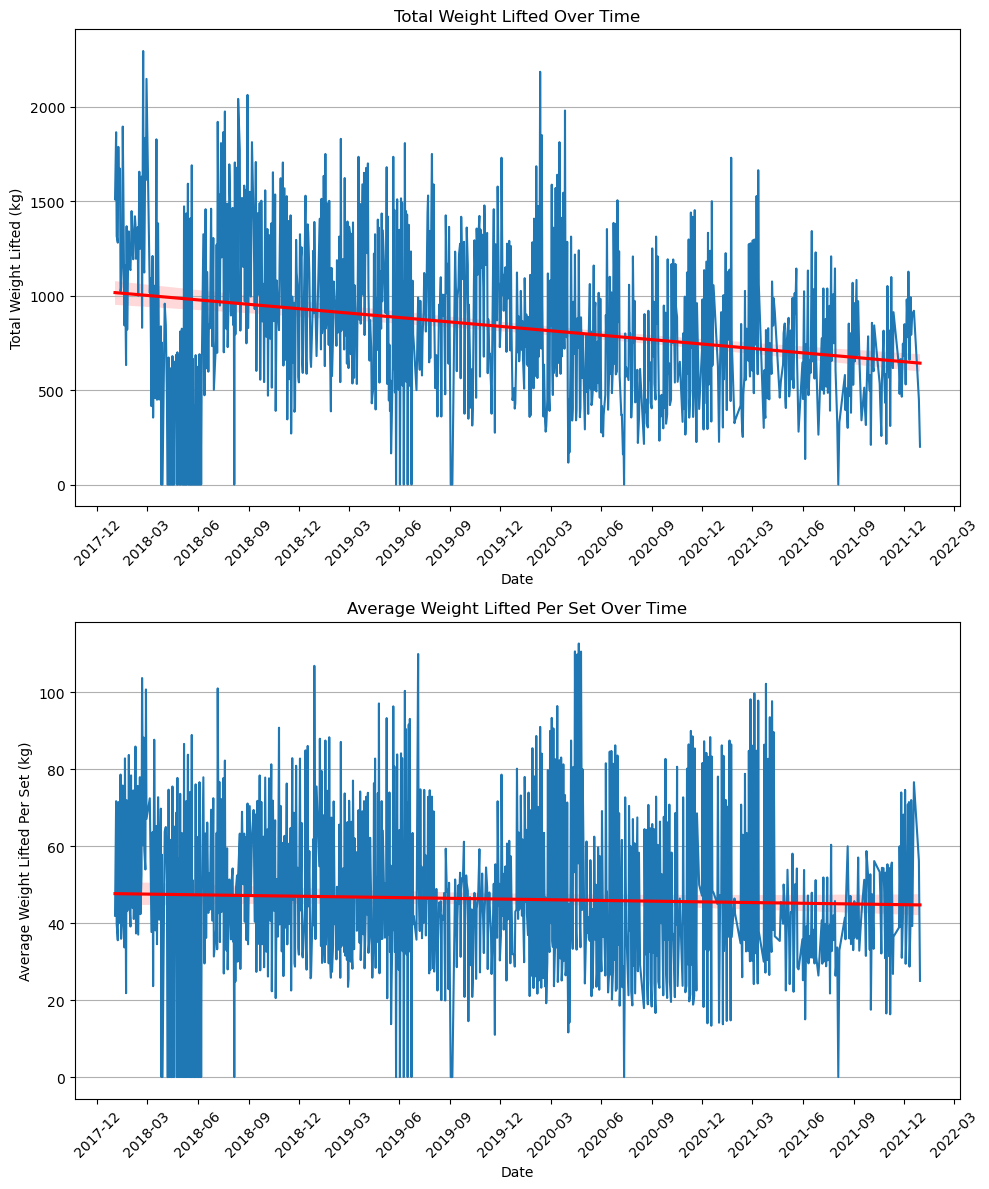

In [54]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Convert dates to numbers for regression line
weight_progression['date_num'] = mdates.date2num(weight_progression['parsed_date'])

# Plot the line graph for total weight lifted over time on the first subplot
sns.lineplot(ax=axes[0], data=weight_progression, x='date_num', y='weight')
sns.regplot(ax=axes[0], data=weight_progression, x='date_num', y='weight', scatter=False, color='red')

# Convert x-axis back to dates
axes[0].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

axes[0].set_title('Total Weight Lifted Over Time')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Total Weight Lifted (kg)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].yaxis.grid(True)  # Add horizontal gridlines

# Plot the line graph for average weight lifted per set over time on the second subplot
sns.lineplot(ax=axes[1], data=weight_progression, x='date_num', y='average_weight_per_set')
sns.regplot(ax=axes[1], data=weight_progression, x='date_num', y='average_weight_per_set', scatter=False, color='red')

# Convert x-axis back to dates
axes[1].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

axes[1].set_title('Average Weight Lifted Per Set Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Average Weight Lifted Per Set (kg)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].yaxis.grid(True)  # Add horizontal gridlines

plt.tight_layout()
plt.show()


These plots indicate a pretty stable average and maximum weight lifted over time. Overall, the trend seems to even be slightly declining, especially in the total lifted weight. 

We should be aware that these measures are highly dependent on the type of excercises used. For example, if I do a lot of deadlifts, back will get much higher weights compared to if I did lat pulldowns (that's just the nature of the different excercises). Thus, it would be optimal to do a similar comparison on specific excercises that have been consistently performed. Unfortunately, in this dataset there are multiple namings of the same excercises (due to renaming over time) which would need to be found and merged to do this. 

However, the back excercises "Barbell Row" and "Lat Pulldown", and the hamstring excercise "Seated Leg Curl" have had the same names since the beginning, so I'll plot those. 

In [55]:
df_clean['excercise_type'].unique()

array(['Pull Up', 'Dips', 'Seated Stack Leg Press', 'Back Extension',
       'Bench Press ', 'Technogym Leg Extension', 'Seated Leg Curl',
       'Lat Pulldown', 'SLDL', 'Lying Leg Curl', 'Plate Loaded Row',
       'Plate Loaded Incline Press', 'Close Grip Pushups',
       'Dumbell Spider Curl', 'Lateral Dumbbell Raise', 'Barbell Row',
       'DB Fly', 'DB Curl', 'Dumbell Skullcrusher', 'Upright Barbell Row',
       'Plate Loaded Bicep Curl', 'Pushdowns', 'Machine Lateral Raise',
       'DB Lunges', 'Smith JM Press', 'Smith CGBP', 'Hack Squat',
       'Incline DB Fly 30’', 'Paused Smith Incline Press 30’',
       'High Bar Squat', 'Push Ups', 'Bulgarian DB Split Squat',
       'Incline Curls', 'Straight Arm Pushdown', 'Rope Facepull',
       'Assisted Bulgarian Split Squat', 'Single Arm DB Raise',
       'Decline Pushup', 'Neutral Grip Pulldown', 'Chin Up',
       'Overhead Press', 'Deficit Pushups',
       'Low Incline Dumbbell Press 15’', 'Ez-Bar Pushdown',
       'Lat Pulldown TRYON

In [56]:
selected_excercises = ['Barbell Row', 'Lat Pulldown', 'Seated Leg Curl']

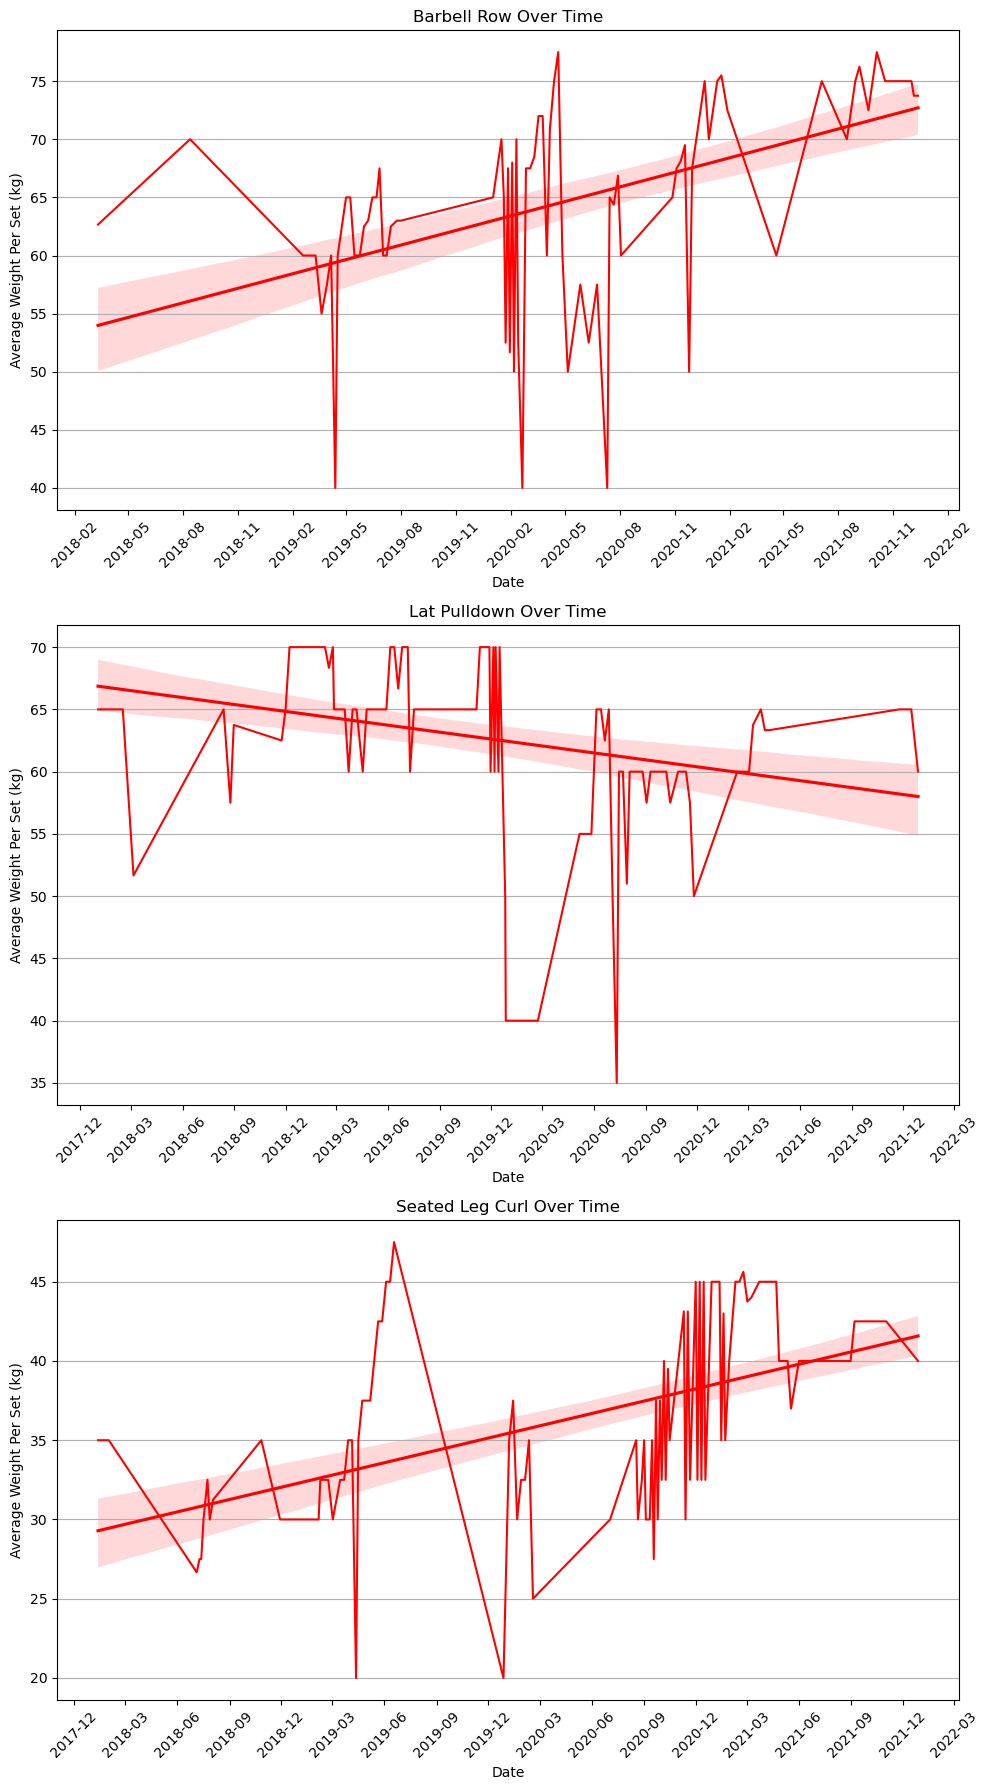

In [57]:
# Filter out the data for the selected exercises
selected_excercises_data = df_clean[df_clean['excercise_type'].isin(selected_excercises)]

# Calculate total weight and average weight per set for each exercise and date
excercise_data_grouped = selected_excercises_data.groupby(['parsed_date', 'excercise_type']).agg(
    total_weight=('weight', 'sum'),
    sets=('sets', 'sum')
).reset_index()
excercise_data_grouped['average_weight_per_set'] = excercise_data_grouped['total_weight'] / excercise_data_grouped['sets']

# Convert 'parsed_date' to datetime
excercise_data_grouped['parsed_date'] = pd.to_datetime(excercise_data_grouped['parsed_date'])

# Convert dates to numbers for regression line
excercise_data_grouped['date_num'] = mdates.date2num(excercise_data_grouped['parsed_date'])

# Create a subplot for each exercise
fig, axes = plt.subplots(nrows=len(selected_excercises), ncols=1, figsize=(10, 6*len(selected_excercises)))

for i, excercise in enumerate(selected_excercises):
    # Filter data for the current exercise
    temp_df = excercise_data_grouped[excercise_data_grouped['excercise_type'] == excercise]
    
    # Plot the average weight lifted per set over time
    sns.lineplot(ax=axes[i], data=temp_df, x='date_num', y='average_weight_per_set', color='red')
    sns.regplot(ax=axes[i], data=temp_df, x='date_num', y='average_weight_per_set', scatter=False, color='red')
    
    # Convert x-axis back to dates
    axes[i].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    axes[i].set_title(f'{excercise} Over Time')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Average Weight Per Set (kg)')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].yaxis.grid(True)  # Add horizontal gridlines

plt.tight_layout()
plt.show()


As you can see, each plot represents a specific exercise. The red line and corresponding trendline represent the average weight per set for each exercise over time. The trendline, plotted using linear regression, gives an indication of the overall trend in the data.

Looking at these plots, it seems that the average weight per set for 'Barbell Row' and 'Seated Leg Curl', there's a clear upward trend. The average weight for lat pulldown appears to face a slight decline. 

## RQ4: Do I have any imbalances regarding body parts in my workouts?

An imbalance in workouts can lead to overdeveloped certain muscle groups at the expense of others, which can potentially lead to injuries or other health issues. By analyzing your workout data, we can determine if such imbalances exist in your workout regimen.

To do this, we can compare the number of sets I do for different target muscles. If some muscles are consistently worked out more than others, this could indicate an imbalance.

Let's calculate the total number of sets and reps for each muscle group over the entire period for which we have data. We can then visualize these totals to see which muscles are being worked the most.

To make the comparison fair, we can also normalize these totals by the number of workouts dedicated to each muscle group. This would give us the average number of sets and reps per workout, which might be a more meaningful metric to consider.

In [58]:
# Calculate total sets and reps for each target muscle group
muscle_group_totals = df_clean.groupby('target_muscle').agg(
    total_sets=('sets', 'sum'),
    total_reps=('reps', 'sum')
).reset_index()

# Calculate total workouts for each target muscle group
muscle_group_workouts = df_clean.groupby('target_muscle')['parsed_date'].nunique().reset_index()
muscle_group_workouts.rename(columns={'parsed_date': 'total_workouts'}, inplace=True)

# Merge the two DataFrames
muscle_group_totals = pd.merge(muscle_group_totals, muscle_group_workouts, on='target_muscle')

# Calculate average sets and reps per workout for each target muscle group
muscle_group_totals['avg_sets_per_workout'] = muscle_group_totals['total_sets'] / muscle_group_totals['total_workouts']
muscle_group_totals['avg_reps_per_workout'] = muscle_group_totals['total_reps'] / muscle_group_totals['total_workouts']

# Exclude unwanted muscle groups
unwanted_muscles = ['Forearms', 'Cardio', 'Övriga', 'Calisthenics']
muscle_group_totals = muscle_group_totals[~muscle_group_totals['target_muscle'].isin(unwanted_muscles)]

# Sort by average sets per workout
muscle_group_totals.sort_values('avg_sets_per_workout', ascending=False, inplace=True)

muscle_group_totals

,target_muscle,total_sets,total_reps,total_workouts,avg_sets_per_workout,avg_reps_per_workout
9,Quads & Glutes,2348,26196.0,439,5.348519,59.671982
5,Chest,2868,26772.0,540,5.311111,49.577778
1,Back,2977,28844.0,601,4.953411,47.993344
3,Calves,1357,14319.0,324,4.188272,44.194444
6,Delts,2465,31249.0,600,4.108333,52.081667
11,Triceps,1559,18883.0,444,3.511261,42.529279
2,Biceps,1878,21595.0,543,3.458564,39.769797
8,Hamstrings,1230,13549.0,358,3.435754,37.846369
10,Traps,295,3996.0,90,3.277778,44.400000
0,Abs,340,4063.0,120,2.833333,33.858333


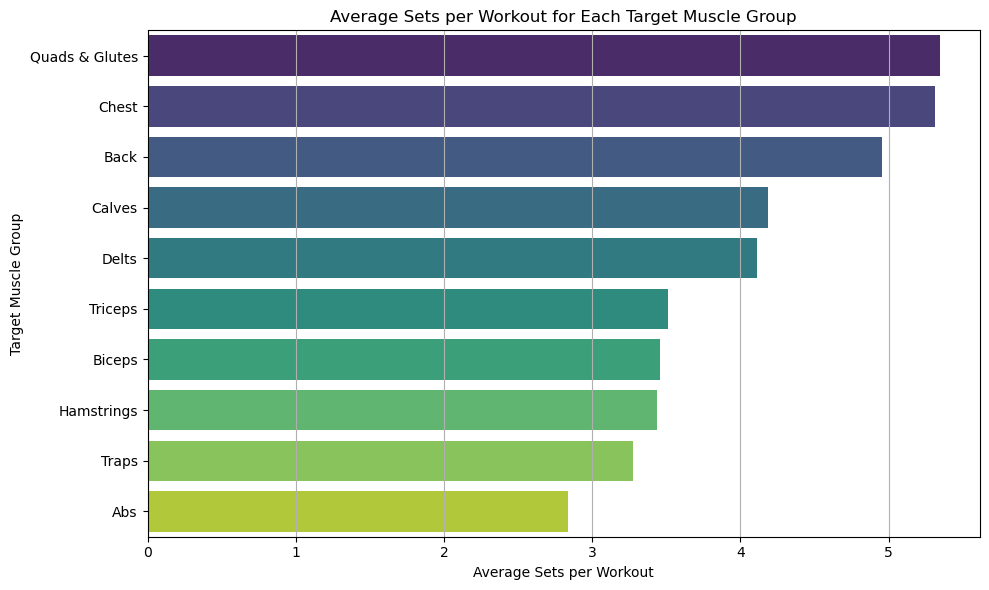

In [59]:
# Create a figure with one subplot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

# Plot average sets per workout for each target muscle group on the subplot
sns.barplot(ax=axes, data=muscle_group_totals, x='avg_sets_per_workout', y='target_muscle', palette='viridis')
axes.set_title('Average Sets per Workout for Each Target Muscle Group')
axes.set_xlabel('Average Sets per Workout')
axes.set_ylabel('Target Muscle Group')
axes.xaxis.grid(True)  # Add vertical gridlines

plt.tight_layout()
plt.show()

The plots above show the average number of sets and reps per workout (that the specific muscle is included in) for each target muscle group.

Looking at the plot, 'Quads & Glutes' are the muscle group with the highest average sets per workout, followed by 'Chest', 'Back', and 'Calves'. The muscle group with the lowest average sets per workout is 'Abs'.

Please note that an imbalance in workouts is not necessarily a bad thing, as it might reflect personal fitness goals. If you're intentionally focusing on certain muscle groups to meet specific fitness objectives, then this imbalance might be appropriate. However, it's always good to be aware of these imbalances so you can make informed decisions about your workout regimen.

## Conclusion